##  Redes Neuronales






##Hola mundo!


In [ ]:
def km_to_millas(km):
  return km * 0.6

In [ ]:
input_kms=list(range(10))

In [ ]:
output_millas = [km_to_millas(n) for n in range(10)]
output_millas

[0.0,
 0.6,
 1.2,
 1.7999999999999998,
 2.4,
 3.0,
 3.5999999999999996,
 4.2,
 4.8,
 5.3999999999999995]

Caso de uso: conversor de grados Celsius a Farenheit

In [ ]:
### Caso Base funcion en python con el algoritmo de equivalencia

def celsius_to_fahrenheit(celsius):
    fahrenheit = (celsius * 9/5) + 32
    return fahrenheit

# Ejemplo de uso
celsius = 25
fahrenheit = celsius_to_fahrenheit(celsius)
print(f"{celsius} grados Celsius es igual a {fahrenheit} grados Fahrenheit.")

### Ahora quiero crear un array de valores que luego voy a reservar para usar en la FNN

input = list(range(1,11,1))
output = []
for n in input:
  output.append(celsius_to_fahrenheit(n))
print(input)
print(output)

25 grados Celsius es igual a 77.0 grados Fahrenheit.
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[33.8, 35.6, 37.4, 39.2, 41.0, 42.8, 44.6, 46.4, 48.2, 50.0]


In [ ]:
celsius_to_fahrenheit(34)


93.2

In [ ]:
import numpy as np
import tensorflow as tf

# Definimos los datos de entrenamiento: grados Celsius y su equivalente en grados Fahrenheit.
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

# Define la red neuronal con una sola neurona.
layer =  tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential(layer)


# Compilando la red.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.2), loss='mean_squared_error')

# La entrenamos
model.fit(celsius, fahrenheit, epochs=600)

# usamos la red neuronal entrenada para hacer predicciones.
celsius_new = np.array([100, 20, 30], dtype=float)
fahrenheit_pred = model.predict(celsius_new)
print("Predicciones en Fahrenheit:", fahrenheit_pred)


Explicacion parte por parte de esta línea de código en Python:

```
keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
```

1. **keras.Sequential**: Esto crea un modelo secuencial en Keras, que es una forma de construir redes neuronales. Un modelo secuencial es apropiado para una pila simple de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.

2. **[ ]**: Estos corchetes indican que estamos pasando una lista de capas a nuestro modelo secuencial. En este caso, solo tenemos una capa en la lista, pero podríamos agregar más capas si fuera necesario.

3. **keras.layers.Dense**: Esto crea una capa densamente conectada, también conocida como capa completamente conectada. En una capa densa, cada neurona está conectada a todas las neuronas de la capa anterior.

4. **units=1**: Esto especifica que nuestra capa densa tendrá una sola neurona. La palabra "units" se refiere a la cantidad de neuronas en la capa.

5. **input_shape=[1]**: Esto especifica la forma de los datos de entrada que se espera que reciba esta capa. En este caso, estamos indicando que la capa recibirá datos con una única característica (un solo valor numérico por entrada). La razón por la que usamos una lista con un único elemento [1] es porque Keras espera que la forma de entrada sea especificada como una lista.

En resumen, esta línea de código crea un modelo secuencial de Keras con una sola capa densa que contiene una sola neurona y espera recibir datos con una sola característica. Esto es consistente con el objetivo de crear una red neuronal de una sola neurona para convertir grados Celsius a Fahrenheit.

Vamos a poner a prueba el resultado

In [ ]:
model.predict(np.array([34], dtype=float))

1/1 [==============================] - 0s 110ms/step


array([[93.1971]], dtype=float32)

Veamos que peso y que sesgo definio la red

In [ ]:
# Obtén los pesos y sesgos de la capa.
weights, biases = model.layers[0].get_weights()

print("Peso:", weights)
print("Sesgo:", biases)

Peso: [[1.8000145]]
Sesgo: [31.996605]


Una FNN (Feedforward Neural Network) es un tipo de red neuronal artificial en la que la información se transmite de manera unidireccional desde la entrada hasta la salida. A diferencia de las redes neuronales recurrentes (RNN), donde la información puede fluir en ciclos o bucles, en una FNN la información siempre se propaga hacia adelante.

La estructura de una FNN incluye varias capas de nodos o neuronas:

1. **Capa de entrada**: donde se ingresan los datos en la red. El número de nodos en esta capa generalmente corresponde al número de características en los datos de entrada.
2. **Capas ocultas**: capas intermedias entre la entrada y la salida. Estas capas realizan transformaciones en los datos a medida que pasan a través de la red. Cada nodo en una capa oculta realiza una combinación lineal de las salidas de la capa anterior y luego aplica una función de activación no lineal.
3. **Capa de salida**: donde se producen las predicciones o clasificaciones de la red. El número de nodos en esta capa corresponde al número de clases en un problema de clasificación o al número de valores que se están prediciendo en un problema de regresión.

Las conexiones entre los nodos en una FNN se representan mediante pesos, que se ajustan durante el entrenamiento utilizando algoritmos de optimización como el descenso de gradiente. Además, cada nodo puede tener un sesgo que también se ajusta durante el entrenamiento.

Una FNN es una de las arquitecturas más simples de redes neuronales y se utiliza a menudo en problemas de clasificación y regresión. Sin embargo, debido a su naturaleza de propagación hacia adelante, no son adecuadas para trabajar con datos secuenciales o datos con estructuras espaciales complejas. Para esos tipos de datos, se suelen utilizar redes neuronales recurrentes (RNN) o redes neuronales convolucionales (CNN).

##Los Datos a usar: MNIST


```python
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualizar las primeras 25 imágenes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_labels[i]))
plt.show()
```

Este código carga el conjunto de datos MNIST, que incluye imágenes de entrenamiento y etiquetas, y luego visualiza las primeras 25 imágenes en una cuadrícula 5x5. Las etiquetas correspondientes se muestran debajo de cada imagen.

MNIST es considerado uno de los conjuntos de datos más básicos en el campo del aprendizaje automático de imágenes y es un punto de partida excelente para quienes están aprendiendo a trabajar con redes neuronales y clasificación de imágenes.

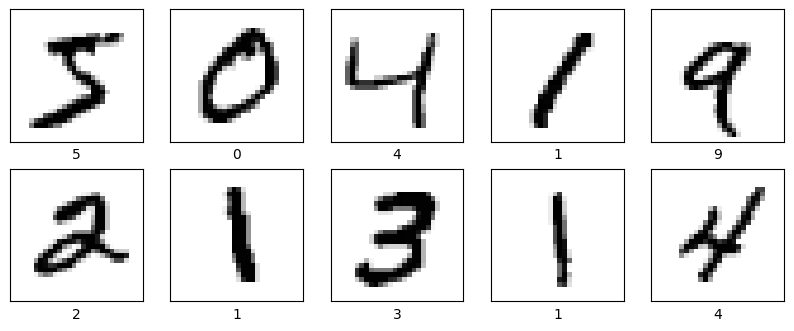

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualizar las primeras 25 imágenes
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_labels[i]))
plt.show()

##Redes Neuronales Recurrentes


**Arquitectura de las RNN**

**Introducción:**

**1. Concepto Básico:**

- Una RNN es un tipo de red neuronal que tiene "memoria". A diferencia de las redes neuronales tradicionales que procesan las entradas de manera independiente, las RNNs mantienen un estado que puede influir en la salida basándose en entradas anteriores.

**2. Arquitectura:**

- Visualicen una neurona tradicional. Ahora, en lugar de sólo enviar la salida hacia adelante, imagine que también envía esta salida hacia atrás para ser utilizada como entrada en el siguiente paso.

- A este bucle se le llama "conexión recurrente". Debido a este bucle, una RNN puede recordar información anterior y está intrínsecamente diseñada para procesar secuencias.

**3. Despliegue Temporal:**

- Una forma de entender las RNNs es "desplegándolas" en el tiempo. Imaginen que cada paso en una secuencia es una capa diferente. Así, una secuencia de 5 pasos se vería como una red de 5 capas.

- Cada "capa" comparte los mismos parámetros, por lo que la "profundidad" de la red no aumenta el número de parámetros.

**4. Aplicaciones:**

- Las RNN son útiles para tareas como:
  - Predicción de series temporales.
  - Generación de texto.
  - Traducción automática.
  - Reconocimiento de voz.

**5. Problemas de las RNN Tradicionales:**

- **Desvanecimiento del Gradiente:** A medida que la red se "despliega" más y más en el tiempo, los gradientes tienden a desvanecerse o explotar, dificultando el entrenamiento.

- **Memoria a corto plazo:** Las RNNs tradicionales tienen dificultades para recordar información de muchos pasos atrás en la secuencia.

**6. Soluciones y Variantes:**

- **LSTM (Long Short-Term Memory):** Una variante de RNN diseñada específicamente para combatir el desvanecimiento del gradiente y mejorar la memoria a largo plazo. Tiene una estructura más compleja que permite "decidir" qué información retener y cuál descartar.

- **GRU (Gated Recurrent Unit):** Otra variante que simplifica un poco la estructura de la LSTM y, en algunas tareas, funciona igual de bien o incluso mejor.

**Conclusión:**

Las RNNs representan una herramienta poderosa para el procesamiento de secuencias en inteligencia artificial. A pesar de sus desafíos, las soluciones y variantes modernas como LSTM y GRU han permitido avances increíbles en áreas como la generación de texto y la traducción automática.



## clasificar imágenes del conjunto de datos MNIST con una RNN

Epoch 1/5
938/938 [==============================] - 19s 18ms/step - loss: 0.4643 - accuracy: 0.8515
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.1891 - accuracy: 0.9443
Epoch 3/5
938/938 [==============================] - 13s 13ms/step - loss: 0.1490 - accuracy: 0.9564
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.1283 - accuracy: 0.9621
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9630
Test accuracy: 0.9629999995231628
313/313 [==============================] - 1s 3ms/step


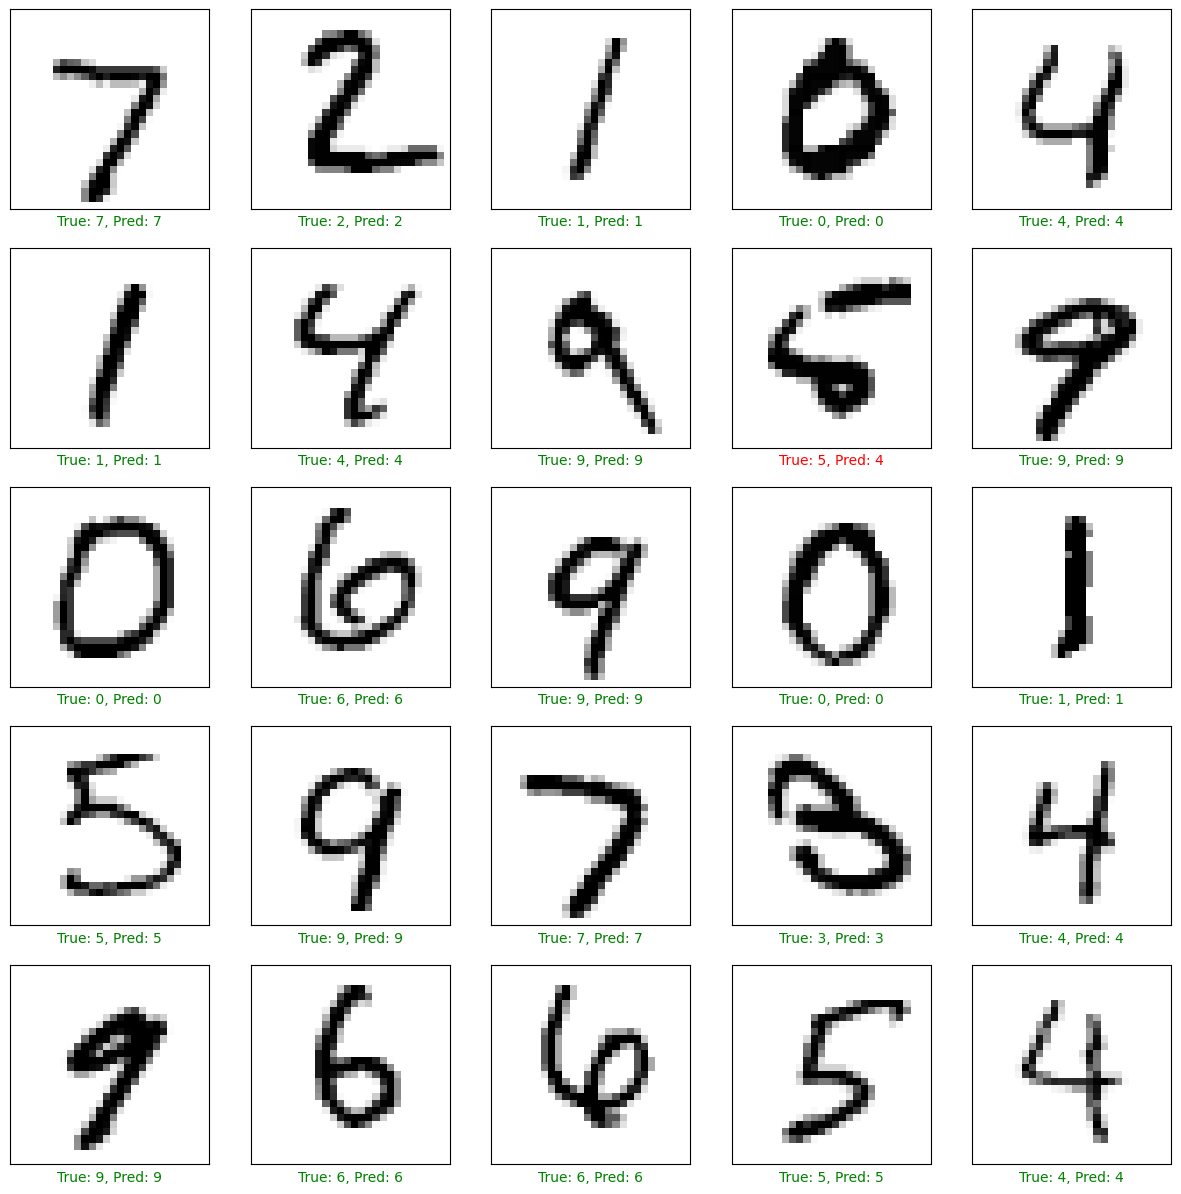

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carga y preprocesamiento de datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Creación de la arquitectura RNN
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

# Compilación y entrenamiento de la RNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluación de la RNN
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Visualizar las imágenes y las predicciones
def visualize_predictions(images, labels, predictions):
    plt.figure(figsize=(15, 15))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        true_label = np.argmax(labels[i])
        predicted_label = np.argmax(predictions[i])
        if true_label == predicted_label:
            color = 'green'
        else:
            color = 'red'
        plt.xlabel(f"True: {true_label}, Pred: {predicted_label}", color=color)
    plt.show()

# Predecir las etiquetas de las imágenes de prueba
predictions = model.predict(test_images)

# Visualizar las imágenes, las etiquetas verdaderas y las predicciones
visualize_predictions(test_images, test_labels, predictions)


In [ ]:
 train_images[14][14]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11372549, 1.        , 0.99607843,
       0.42745098, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

##RNN vs FNN

Las redes neuronales recurrentes (RNN) y las redes neuronales de propagación hacia adelante (FNN) son dos tipos de arquitecturas de redes neuronales que se utilizan para resolver diferentes tipos de problemas de aprendizaje automático. A continuación, presentamos una comparación entre RNN y FNN basada en diversas características:

1. **Flujo de información:**
   - **RNN:** Las RNN tienen conexiones que se retroalimentan a sí mismas, lo que les permite mantener un estado o memoria a lo largo del tiempo. Esto les permite procesar secuencias de datos donde la información actual depende de la información previa.
   - **FNN:** Las FNN tienen un flujo de información unidireccional desde la entrada hasta la salida, sin conexiones que se retroalimenten. No tienen memoria interna y tratan cada entrada de forma independiente.

2. **Tipos de datos:**
   - **RNN:** Son adecuadas para trabajar con datos secuenciales, como series temporales, texto, audio y video, donde el orden de los datos es importante y hay dependencias temporales.
   - **FNN:** Son más adecuadas para trabajar con datos no secuenciales, como imágenes, donde las dependencias temporales no son relevantes.

3. **Capacidad de modelado de dependencias temporales:**
   - **RNN:** Pueden modelar dependencias temporales en los datos, lo que las hace útiles para tareas como análisis de sentimiento, traducción automática, reconocimiento de voz y predicción de series temporales.
   - **FNN:** No pueden modelar dependencias temporales ya que tratan cada entrada de forma independiente.

4. **Arquitectura y complejidad:**
   - **RNN:** Tienen una arquitectura más compleja que incluye conexiones recurrentes que se retroalimentan a sí mismas. Esto las hace más difíciles de entrenar y más propensas a problemas como el desvanecimiento o explosión del gradiente.
   - **FNN:** Tienen una arquitectura más simple y directa con conexiones unidireccionales entre las capas. Son más fáciles de entrenar y entender.

5. **Número de parámetros:**
   - **RNN:** Suelen tener menos parámetros que las FNN ya que comparten pesos entre las etapas temporales. Esto las hace más eficientes en términos de memoria para tratar con secuencias largas.
   - **FNN:** Pueden tener un número mayor de parámetros ya que no comparten pesos entre las capas. Esto puede hacer que tengan un mayor requerimiento de memoria y sean más propensas al sobreajuste.

En resumen, las RNN y las FNN son adecuadas para diferentes tipos de problemas de aprendizaje automático. Las RNN son más adecuadas para trabajar con datos secuenciales donde hay dependencias temporales, mientras que las FNN son más adecuadas para trabajar con datos no secuenciales donde no hay dependencias temporales.

predictor de precios de inmuebles segun sus caracteristicas

In [ ]:
idea para los alumnos, que puedan evaluar y portar el codigo con datos de las apis de inmuebles de su zona

por ej,
https://developers.mercadolibre.com.ar/es_ar/ubicacion-y-monedas#close

SyntaxError: ignored

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Cargamos el conjunto de datos de precios de viviendas de California
california = fetch_california_housing()
X = california.data
Y = california.target

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalamos las características a una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos una FNN
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Sin función de activación para regresión
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mse')  # Usamos el error cuadrático medio (MSE) para regresión

# Entrenamos el modelo
model.fit(X_train, Y_train, epochs=50)

# Evaluamos el modelo
loss = model.evaluate(X_test, Y_test)
print("Loss:", loss)


In [ ]:
# Supongamos que tienes las siguientes características de 3 viviendas diferentes:
# - MedIncome, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
new_homes = [
    [10.3252, 11.0, 7.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23],  # Vivienda 1
    [7.2574, 52.0, 8.2881, 1.0738, 240.0, 2.1098, 37.86, -122.22],  # Vivienda 2
    [5.6431, 52.0, 5.8172, 1.0738, 496.0, 2.8026, 37.85, -122.24]   # Vivienda 3
]

# Escalamos las características de las nuevas viviendas utilizando el mismo escalador que usamos para los datos de entrenamiento
new_homes_scaled = scaler.transform(new_homes)

# Hacemos predicciones con el modelo entrenado
predicted_prices = model.predict(new_homes_scaled)

# Imprimimos las predicciones
for i, price in enumerate(predicted_prices):
    print(f"Vivienda {i+1}: Precio estimado: ${price[0] * 100000:.2f}")


1/1 [==============================] - 0s 31ms/step
Vivienda 1: Precio estimado: $537428.00
Vivienda 2: Precio estimado: $470348.74
Vivienda 3: Precio estimado: $258517.17


In [ ]:
len(X)

20640

enteniendo los datos
Los valores de las viviendas en el ejemplo se representan mediante características numéricas, que representan información sobre cada vivienda. Aquí está lo que representan cada una de las características:

1. **MedIncome:** Ingreso medio del vecindario donde se encuentra la vivienda (en decenas de miles de dólares).
2. **HouseAge:** Edad de la vivienda (en años).
3. **AveRooms:** Número promedio de habitaciones por vivienda en el vecindario.
4. **AveBedrms:** Número promedio de dormitorios por vivienda en el vecindario.
5. **Population:** Población total del vecindario.
6. **AveOccup:** Ocupación promedio de las viviendas en el vecindario (número de personas por vivienda).
7. **Latitude:** Latitud de la vivienda.
8. **Longitude:** Longitud de la vivienda.

Por ejemplo, consideremos los datos de la primera vivienda en el ejemplo:

```
[8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23]
```

Esto se interpretaría como:

- La renta media en el vecindario es de aproximadamente $83,252 (8.3252 * 10,000).
- La vivienda tiene 41 años de antigüedad.
- El número promedio de habitaciones por vivienda en el vecindario es de aproximadamente 6.98.
- El número promedio de dormitorios por vivienda en el vecindario es de aproximadamente 1.02.
- La población total del vecindario es de 322 personas.
- La ocupación promedio de las viviendas en el vecindario es de aproximadamente 2.56 personas por vivienda.
- La vivienda se encuentra en la latitud 37.88 y longitud -122.23.

Estos valores se utilizan como entrada para el modelo de red neuronal, que luego hace una predicción del precio de la vivienda en función de estas características.

In [ ]:
# Características de 5 viviendas diferentes:
# - MedIncome, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

new_homes = [
    [4.6250, 34.0, 5.0373, 0.9755, 558.0, 2.3008, 33.64, -117.91], # Vivienda 4
    [3.1200, 24.0, 4.7857, 1.0811, 835.0, 2.6686, 34.14, -117.91], # Vivienda 5
    [5.7400, 30.0, 6.1351, 0.9787, 570.0, 2.7681, 36.78, -119.80], # Vivienda 6
    [2.0804, 26.0, 4.1739, 1.0435, 694.0, 3.0145, 33.92, -118.34], # Vivienda 7
    [3.5542, 52.0, 5.3043, 1.0217, 331.0, 2.7174, 37.76, -122.24]  # Vivienda 8
]

# Escalamos las características de las nuevas viviendas utilizando el mismo escalador que usamos para los datos de entrenamiento
new_homes_scaled = scaler.transform(new_homes)

# Hacemos predicciones con el modelo entrenado
predicted_prices = model.predict(new_homes_scaled)

# Imprimimos las predicciones
for i, price in enumerate(predicted_prices):
    print(f"Vivienda {i+4}: Precio estimado: ${price[0] * 100000:.2f}")


1/1 [==============================] - 0s 75ms/step
Vivienda 4: Precio estimado: $254958.77
Vivienda 5: Precio estimado: $156365.37
Vivienda 6: Precio estimado: $130479.97
Vivienda 7: Precio estimado: $178304.33
Vivienda 8: Precio estimado: $187698.81


RNN y analisis de sentimientos

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parámetros
max_words = 20000 # Número máximo de palabras en el vocabulario
max_length = 80 # Máxima longitud de la secuencia de entrada

# Cargamos los datos
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Ajustamos la longitud de las secuencias de entrada
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Creamos el modelo
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=128),
    keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(x_train, y_train,
          batch_size=32,
          epochs=5,
          validation_data=(x_test, y_test))

# Evaluamos el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


In [ ]:
https://developers.mercadolibre.com.ar/es_ar/api-docs-es